In [ ]:
pip install imbalanced-learn

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
import copy
import os
import imageio
import imageio.v3 as iio

#Question 1


## Load dataset

In [ ]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
df = pd.DataFrame(X, columns=iris.feature_names)

## Dataset information

###Shape, length, mean, variance

In [ ]:
print('data shape:', X.shape)
print('number of samples:', len(X))
print('mean of features:', np.mean(X, axis=0))
print('variance of features:', np.var(X, axis=0))

data shape: (150, 4)
number of samples: 150
mean of features: [5.84333333 3.05733333 3.758      1.19933333]
variance of features: [0.68112222 0.18871289 3.09550267 0.57713289]


###Heatmap

<Axes: >

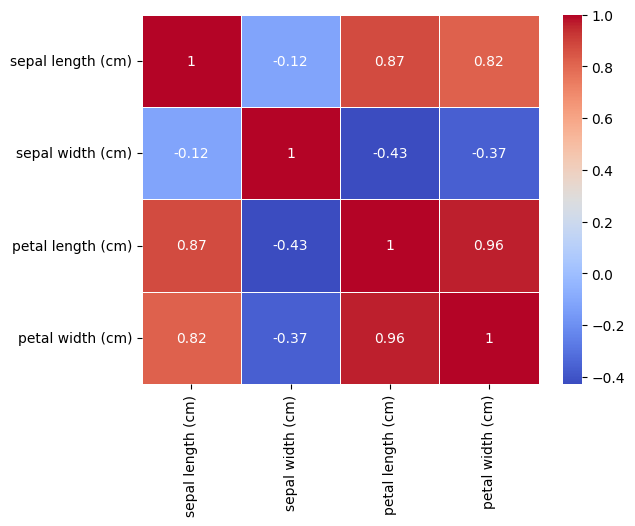

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)

###Pairplot

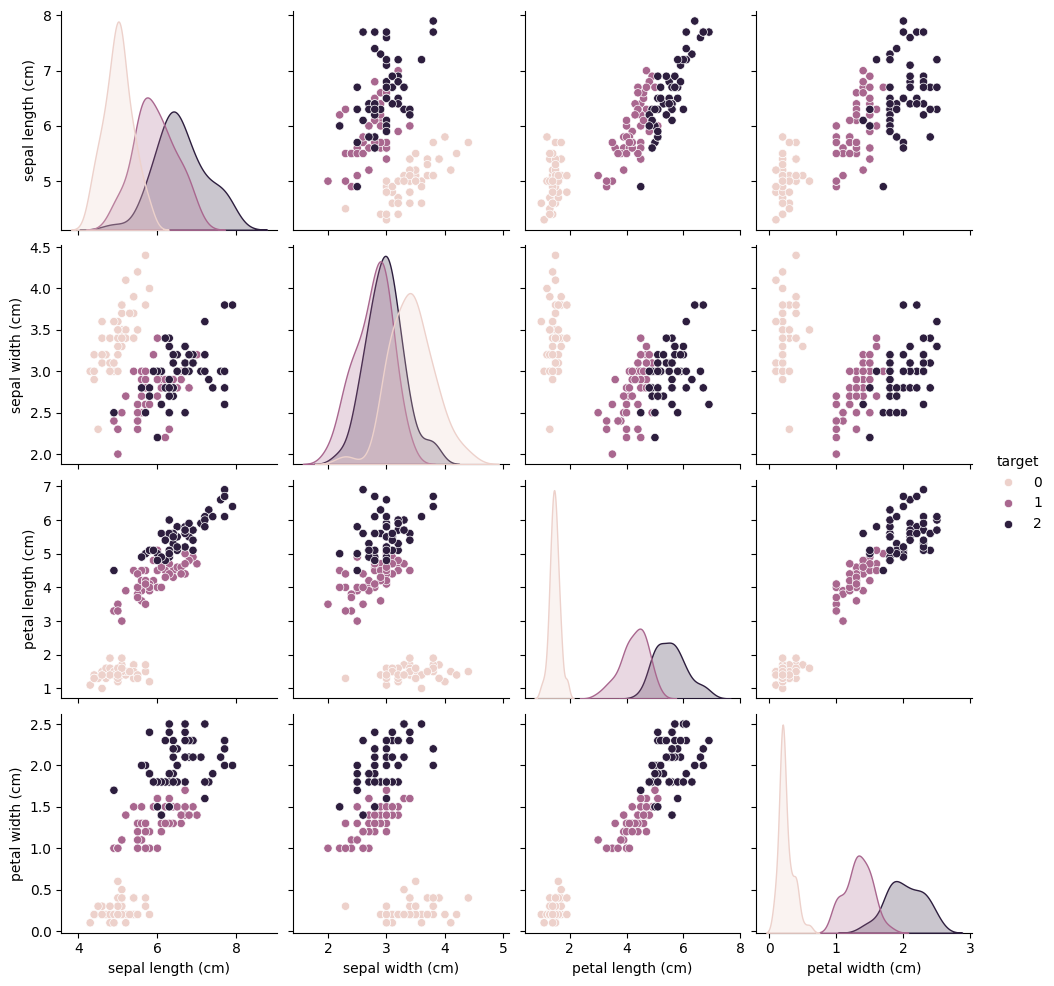

In [ ]:
df['target'] = y
ax = sns.pairplot(df, hue='target')

##TSNE

###1D TSNE

In [ ]:
TSNE_model = TSNE(n_components=1, random_state=14)
TNSE_data = TSNE_model.fit_transform(X)
print(TNSE_data.shape)

(150, 1)


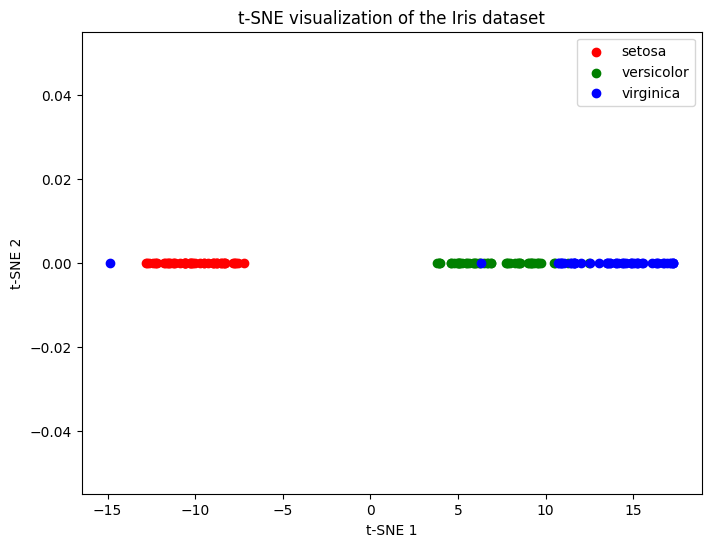

In [ ]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], iris.target_names):
  plt.scatter(TNSE_data[y==i], np.zeros_like(TNSE_data[y==i]), color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE visualization of the Iris dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

###2D TSNE

In [ ]:
TSNE_model = TSNE(n_components=2, random_state=14)
TNSE_data = TSNE_model.fit_transform(X)
print(TNSE_data.shape)

(150, 2)


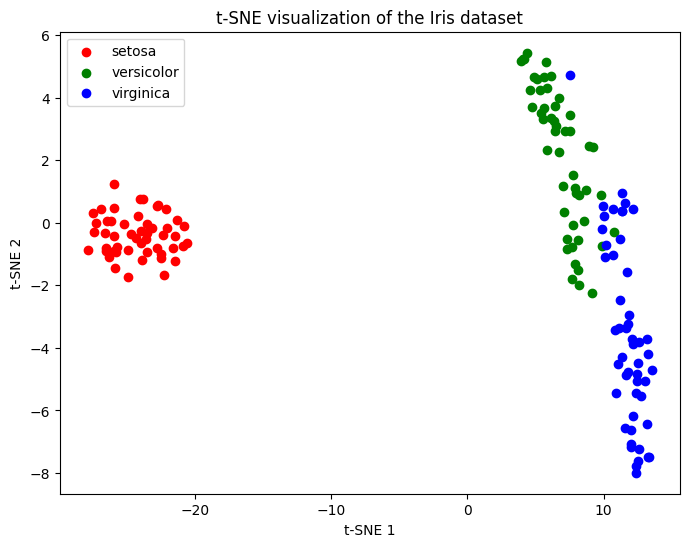

In [ ]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], iris.target_names):
  plt.scatter(TNSE_data[y==i, 0], TNSE_data[y==i, 1], color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE visualization of the Iris dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

3D TSNE

In [ ]:
TSNE_model = TSNE(n_components=3, random_state=14)
TNSE_data = TSNE_model.fit_transform(X)
print(TNSE_data.shape)

(150, 3)


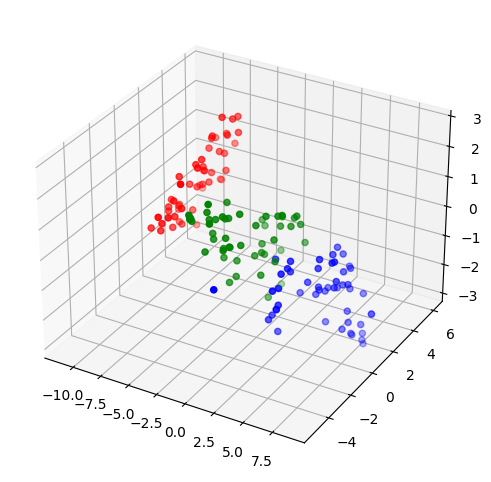

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], iris.target_names):
  ax.scatter(TNSE_data[y==i, 0], TNSE_data[y==i, 1], TNSE_data[y==i, 2], color=color, label=target_name)

##LDA

###Normalize data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###1D LDA

In [ ]:
LDA_model = LDA(n_components=1)
LDA_data = LDA_model.fit_transform(X_scaled, y)


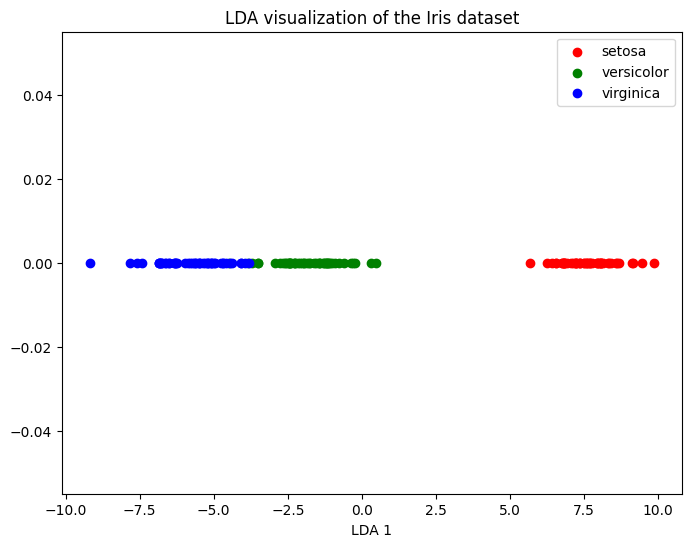

In [ ]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], iris.target_names):
  plt.scatter(LDA_data[y==i], np.zeros_like(LDA_data[y==i]), color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA visualization of the Iris dataset')
plt.xlabel('LDA 1')

plt.show()

###2D LDA

In [ ]:
LDA_model = LDA(n_components=2)
LDA_data = LDA_model.fit_transform(X_scaled, y)


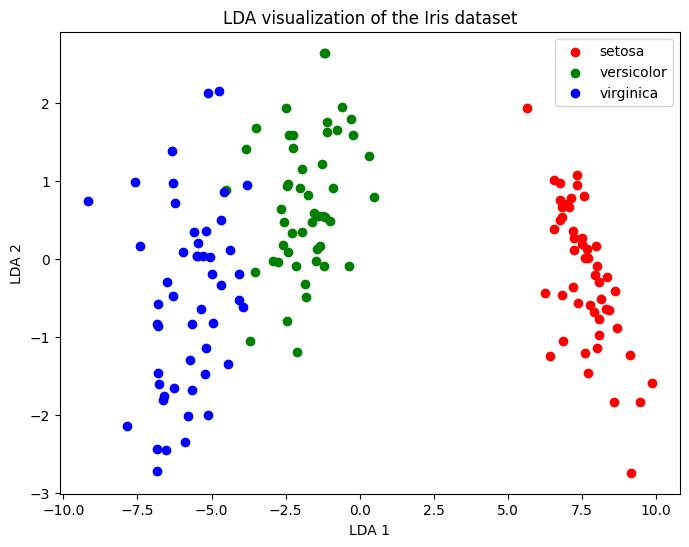

In [ ]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], iris.target_names):
  plt.scatter(LDA_data[y==i, 0], LDA_data[y==i, 1], color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA visualization of the Iris dataset')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()

##Define plot decision boundry function

In [ ]:
def plot_decision_boundaries(X, y, model, title='', save=False, num=0):
  step = 0.02
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
  z = model.predict(np.c_[x1.flatten(), x2.flatten()])
  z = z.reshape(x1.shape)
  plt.contourf(x1, x2, z, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  plt.title(title)
  if save == True:
    plt.savefig(f'plots/frame_{num:02d}.png')
  plt.show()


##Define plot_confusion_matrix function

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=sns.color_palette("viridis", as_cmap=True)):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


## Train and test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(LDA_data, y, test_size=0.2, random_state=14)

## Classification for 2D LDA with linear svm

###Create model

In [ ]:
svm = SVC(C=1.0, kernel='linear', tol=0.001, decision_function_shape='ovr', random_state=14)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=14)

### Plot decision boundry

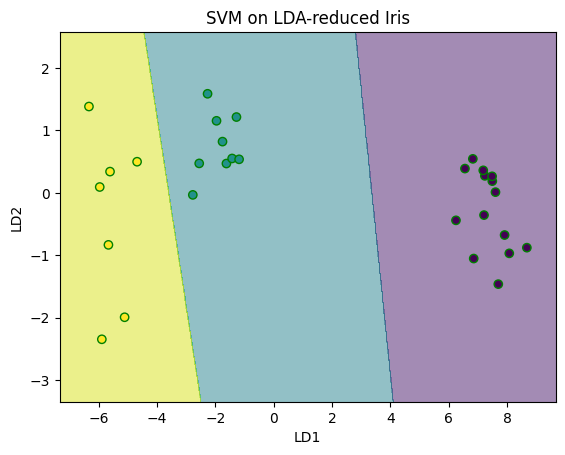

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
y_hat = svm.predict(X_test)
plot_decision_boundaries(X_test, y_test, svm, title='SVM on LDA-reduced Iris')

###Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_hat)
print(confusion_matrix)
print(classification_report(y_test, y_hat))

<function confusion_matrix at 0x7fc8a99fd360>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



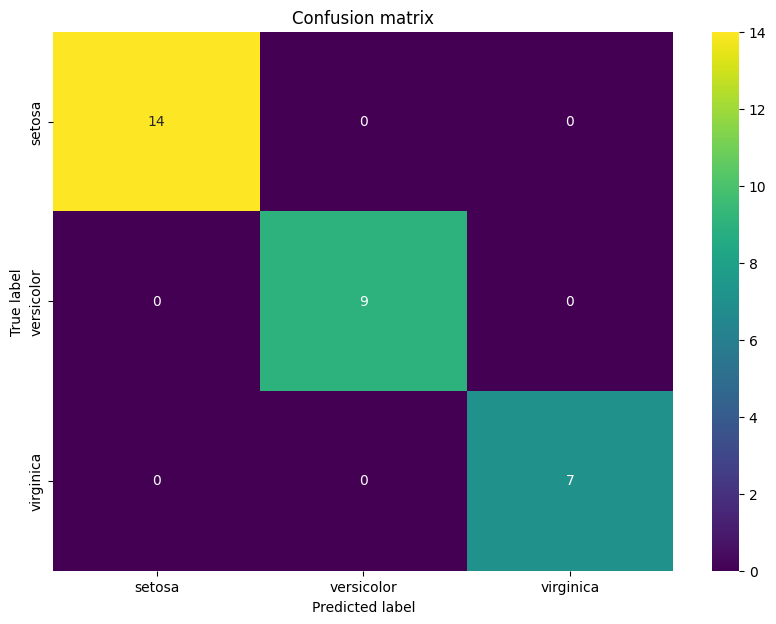

In [ ]:
plot_confusion_matrix(conf_matrix, classes=iris.target_names, normalize=False)

## Classification for 2D LDA with poly svm

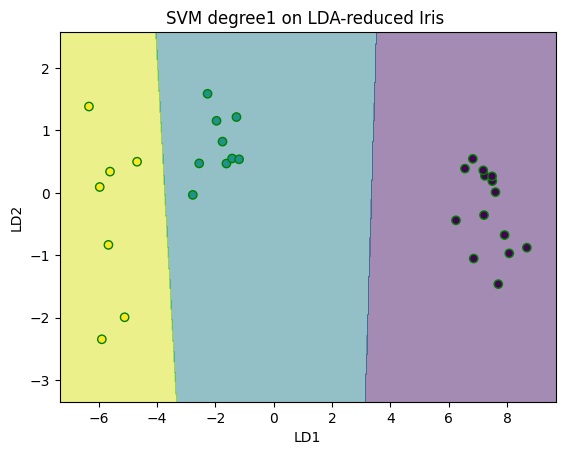

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



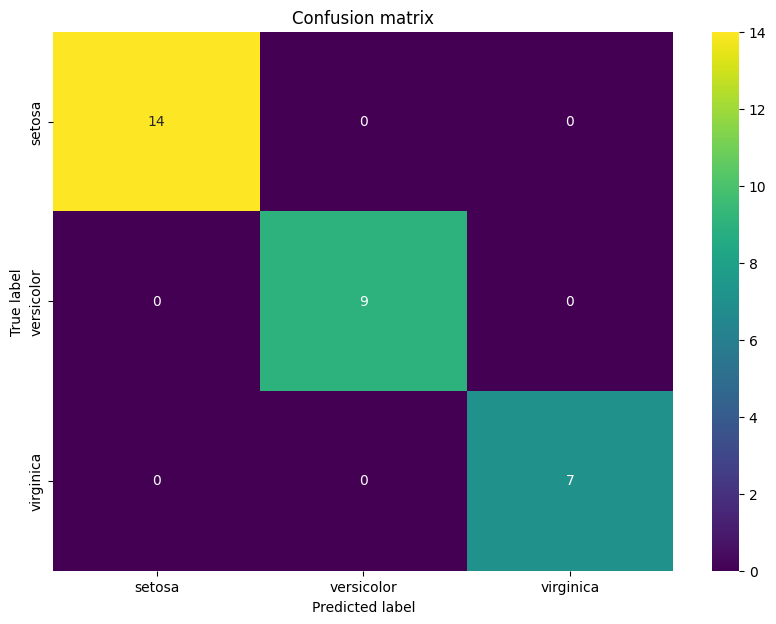

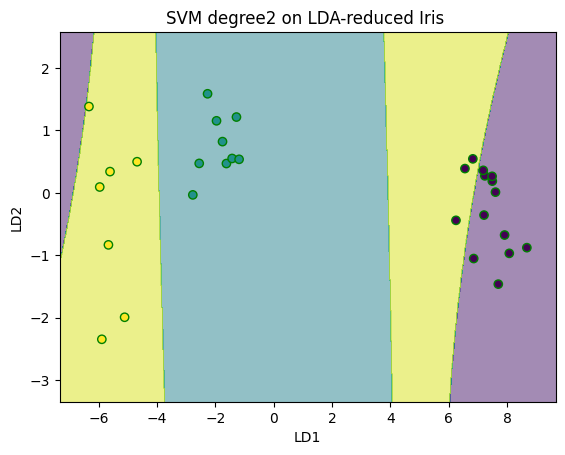

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      1.00      1.00         9
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.93      0.90        30
weighted avg       0.93      0.90      0.90        30



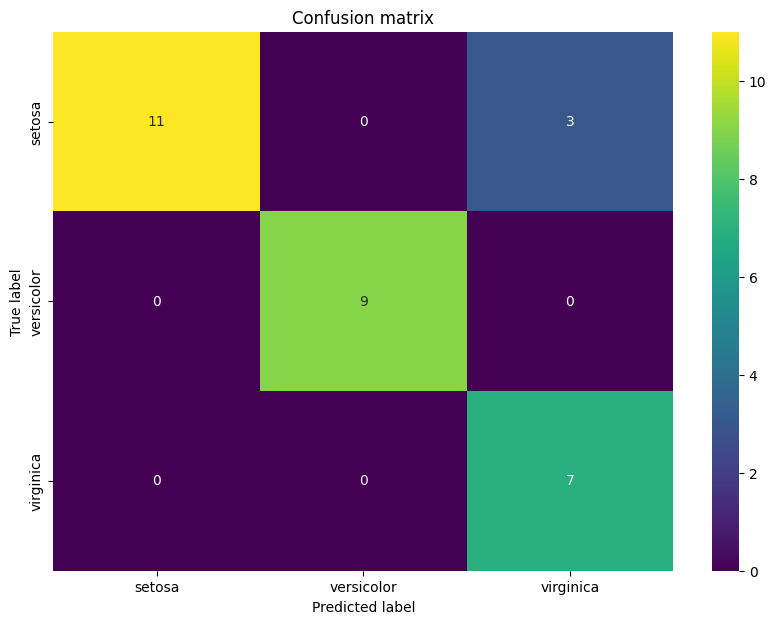

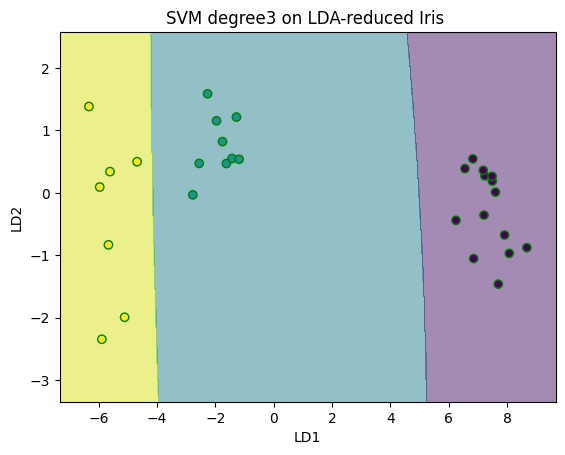

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



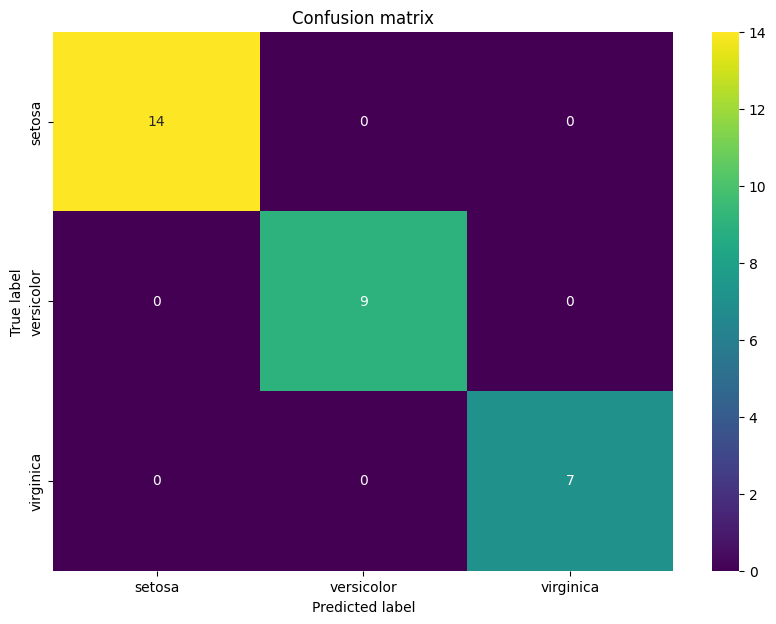

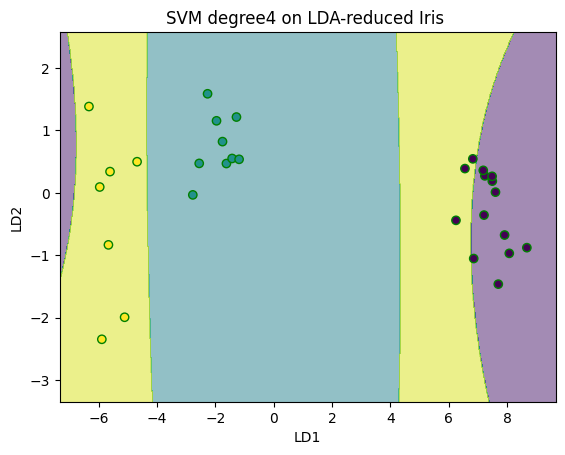

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      1.00      1.00         9
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.93      0.90        30
weighted avg       0.93      0.90      0.90        30



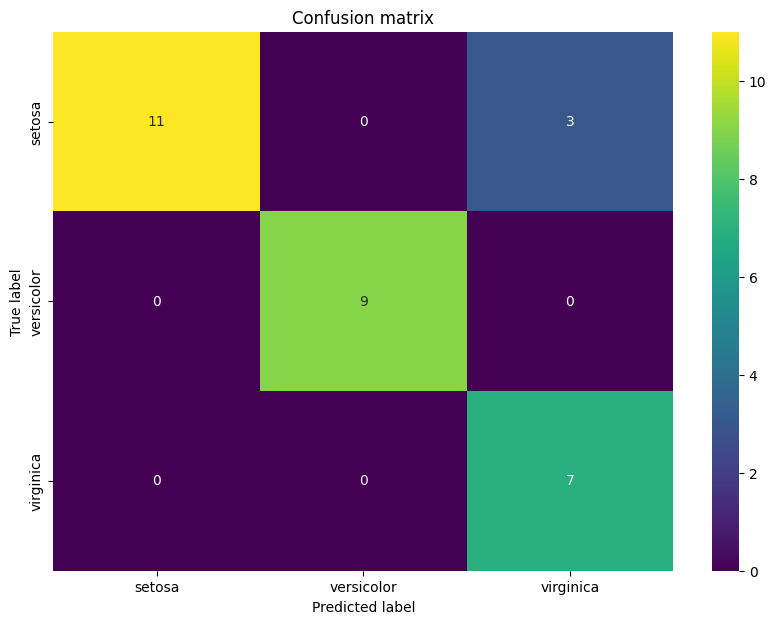

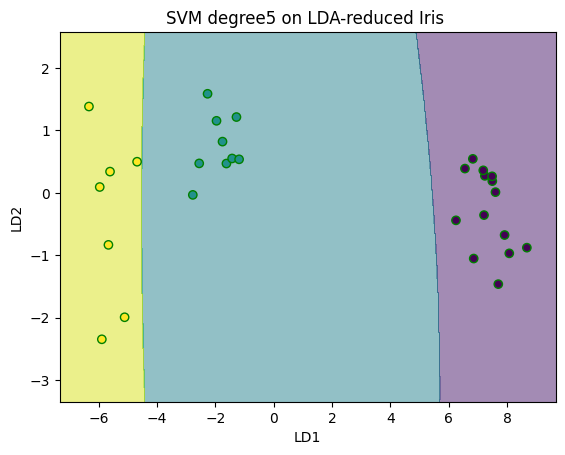

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



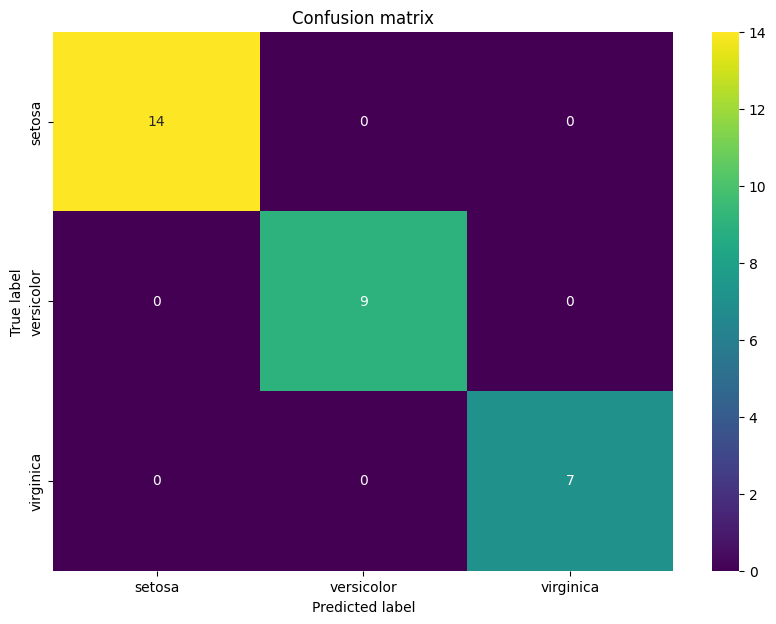

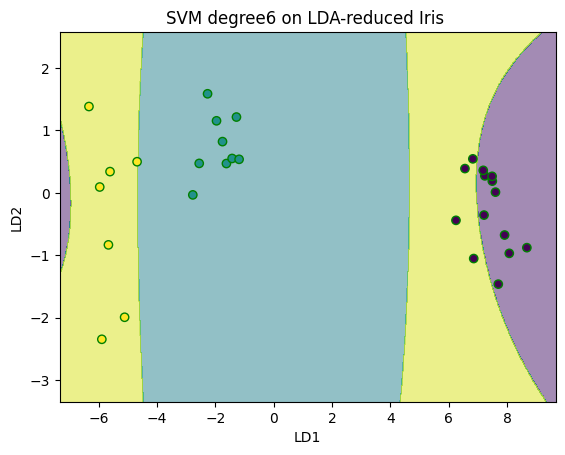

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       1.00      1.00      1.00         9
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.90      0.87        30
weighted avg       0.92      0.87      0.87        30



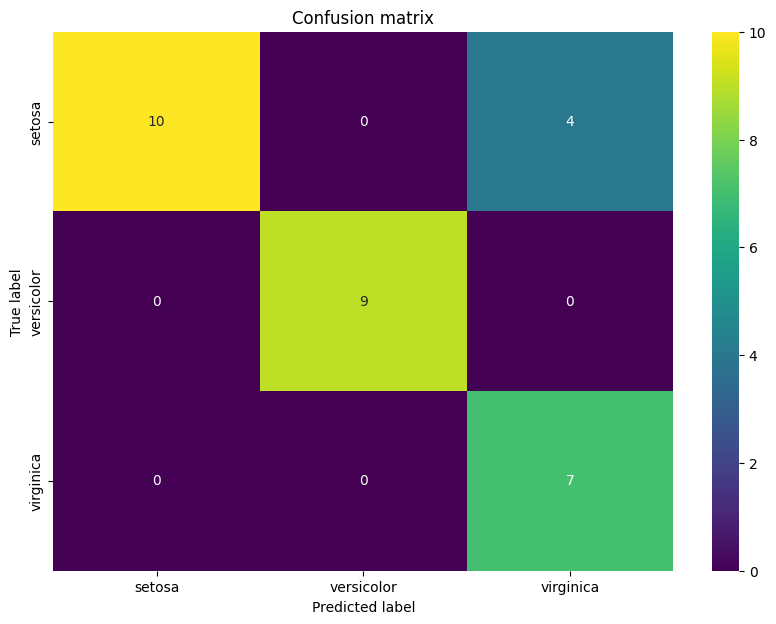

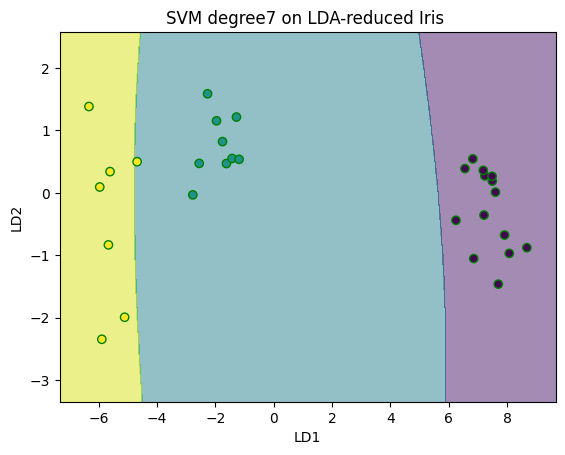

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



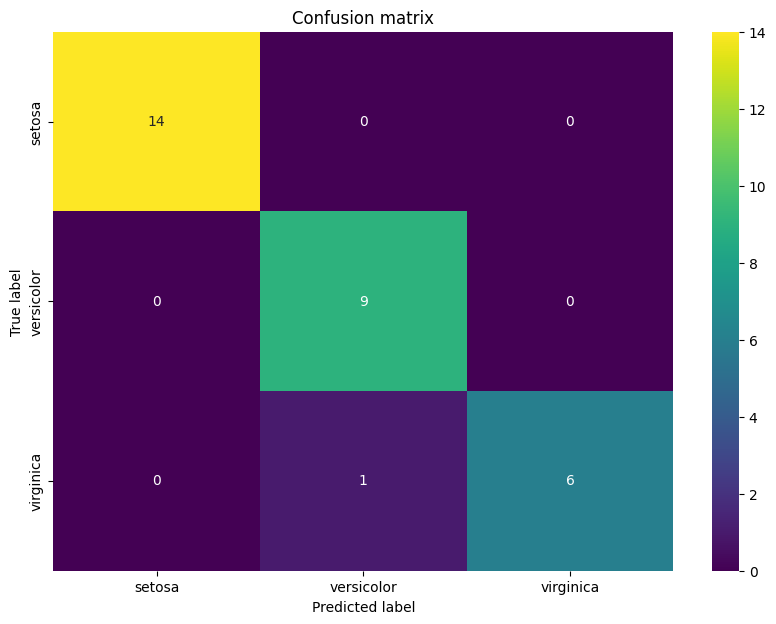

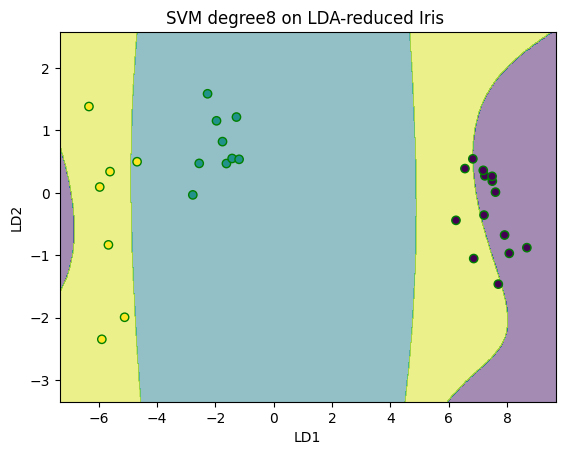

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.90      1.00      0.95         9
           2       0.60      0.86      0.71         7

    accuracy                           0.83        30
   macro avg       0.83      0.86      0.83        30
weighted avg       0.88      0.83      0.84        30



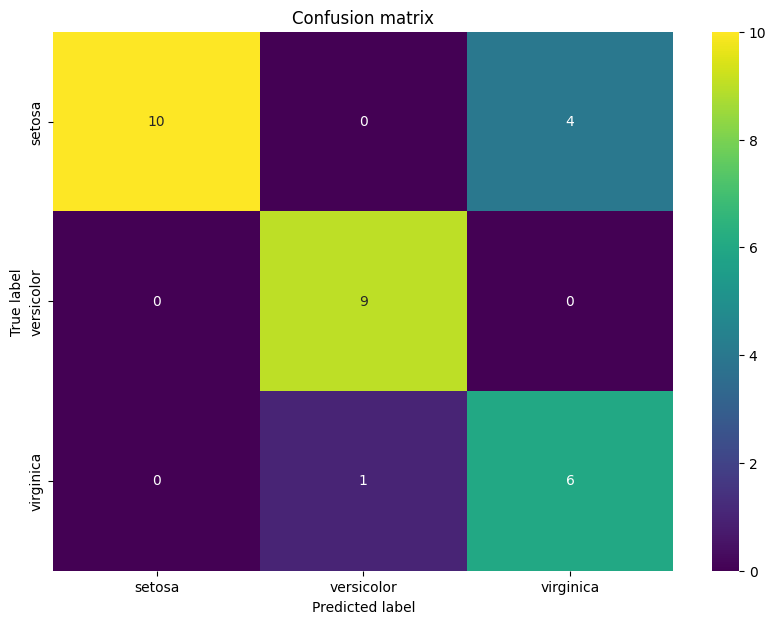

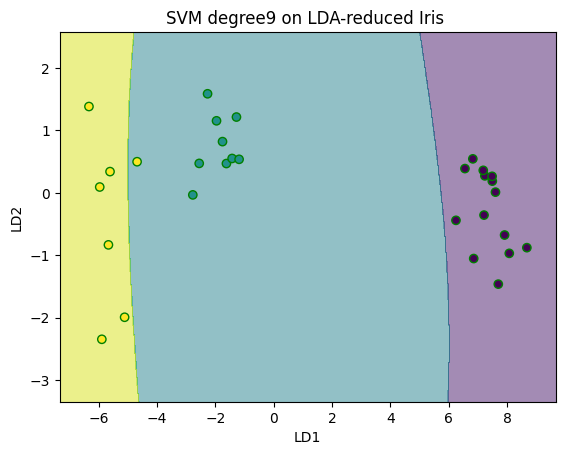

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



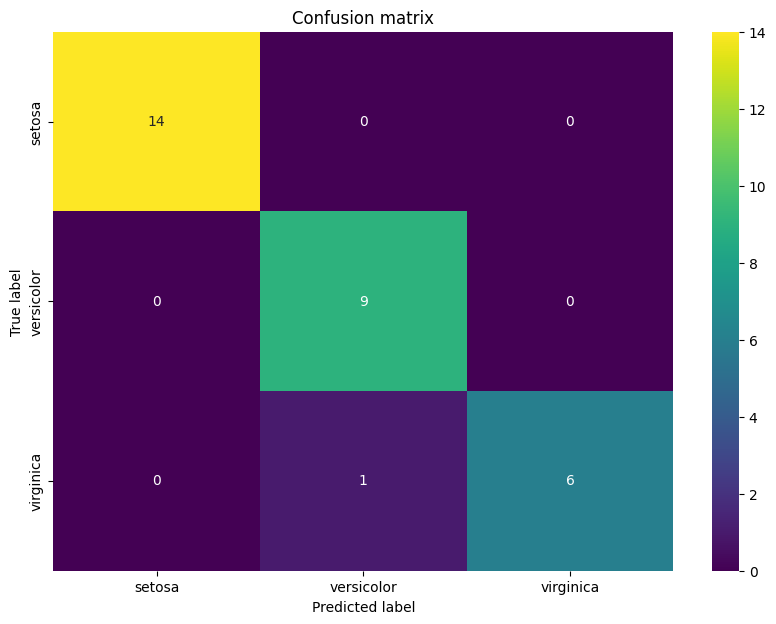

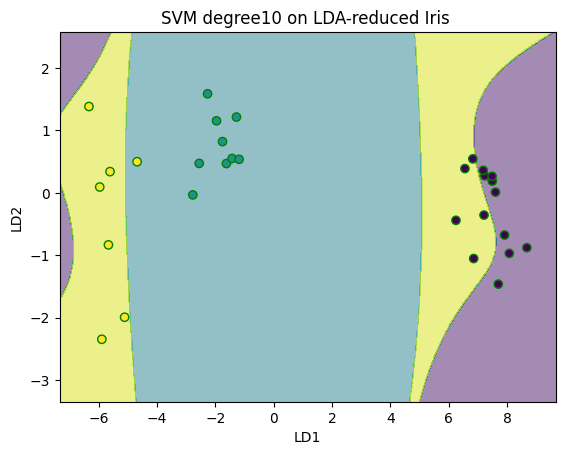

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.90      1.00      0.95         9
           2       0.55      0.86      0.67         7

    accuracy                           0.80        30
   macro avg       0.82      0.83      0.80        30
weighted avg       0.86      0.80      0.80        30



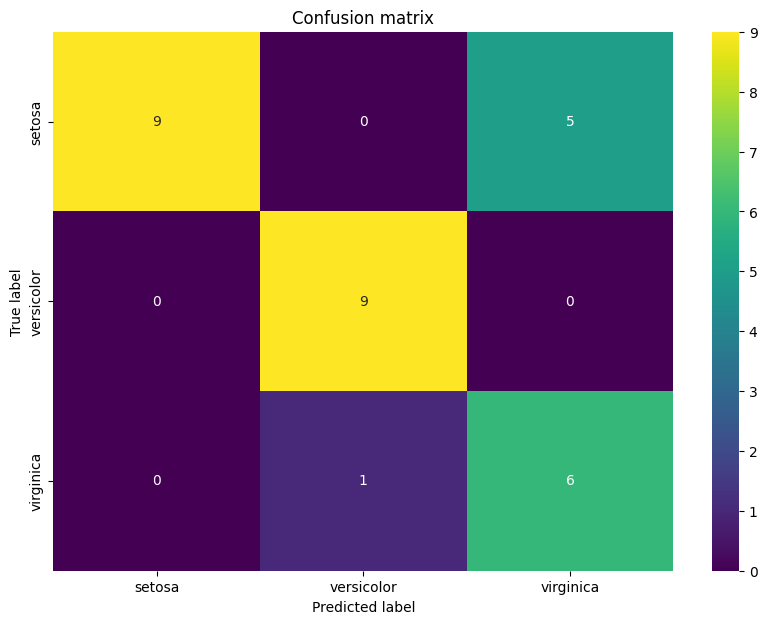

In [ ]:
os.makedirs('plots', exist_ok=True)
for i in range(1,11):
  svm = SVC(C=1.0, kernel='poly', degree=i, tol=0.001, decision_function_shape='ovr', random_state=14)
  svm.fit(X_train, y_train)
  y_hat = svm.predict(X_test)
  plt = plot_decision_boundaries(X_test, y_test, svm, title=f'SVM degree{i} on LDA-reduced Iris ', save=True, num=i)
  print(classification_report(y_test, y_hat))
  plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=iris.target_names, normalize=False)

###Create gif

In [ ]:
images = []
for i in range(10):
    filename = f'plots/frame_{i+1:02d}.png'
    images.append(iio.imread(filename))

with iio.imopen('Decision boundary.gif', 'w') as file:
    file.write(images, fps=2)

#Question3

##Download dataset

In [ ]:
!gdown 1PZEW2zyZlvk3yqbic-PTxt-GGFN1y_o5

Downloading...
From (original): https://drive.google.com/uc?id=1PZEW2zyZlvk3yqbic-PTxt-GGFN1y_o5
From (redirected): https://drive.google.com/uc?id=1PZEW2zyZlvk3yqbic-PTxt-GGFN1y_o5&confirm=t&uuid=3bfedf5a-1ff0-49e9-8478-53cf806da1dd
To: /content/creditcard.csv
100% 151M/151M [00:02<00:00, 55.3MB/s]


##Load dataset

In [ ]:
creditCard = pd.read_csv('creditcard.csv')

##Show dataset information

###Show keys

In [ ]:
print(creditCard.keys())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


###Drop null data and time column

In [ ]:
df = creditCard.drop(columns=['Time'])
df = df.dropna(how='all')
print(df.shape)

(284807, 30)


###Class Frequency

In [ ]:
classFreq = df['Class'].value_counts(normalize=False)
print(classFreq)

Class
0    284315
1       492
Name: count, dtype: int64


##Data preparing

###Data Shuffling

In [ ]:
X, y = shuffle(df.drop(columns=['Class']).values, df['Class'].values, random_state=14)

###Train, test, validation split

In [ ]:
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.4, random_state=14)

X_test, X_validation, y_test, y_validation = train_test_split(X_tv, y_tv, test_size=0.5, random_state=14)

classes, classCounts = np.unique(y_train, return_counts=True)
print(classCounts)

[170562    322]


###Normalize 'Amount' column

In [ ]:
max = X_train[:,-1].max()
min = X_train[:,-1].min()
X_train[:,-1] = (X_train[:,-1] - min)/(max-min)
X_test[:,-1] = (X_test[:,-1] - min)/(max-min)
X_validation[:,-1] = (X_validation[:,-1] - min)/(max-min)

print(X_train.max(axis=0))

[ 2.45492999 22.05772899  9.38255843 16.87534403 34.80166588 23.91783713
 44.05446136 20.00720837 15.59499461 23.74513612 12.01891318  7.84839208
  4.56900896 10.52676605  5.82565432  8.28988956  9.20705854  4.71239757
  5.59197143 38.11720913 27.20283916 10.50309009 22.52841169  4.02286589
  7.51958868  3.46324565 11.13573984 33.84780782  1.        ]


###Data oversampling

In [ ]:
smote = SMOTE(random_state=14)
X_train_oversample, y_train_oversample = smote.fit_resample(X_train, y_train)
X_train_oversample, y_train_oversample = shuffle(X_train_oversample, y_train_oversample, random_state=14)

In [ ]:
classes, classCounts = np.unique(y_train_oversample, return_counts=True)
print(classCounts)

[170562 170562]


In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

###Convert numpy to tensor and create dataset

In [ ]:
X_train_tensor = torch.tensor(X_train_oversample, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_oversample, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation, dtype=torch.long)
validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)

###Create dataloader

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

##Autoencoder

###Create autoencoder class

In [ ]:
class autoencoder(nn.Module):
  def __init__(self, activation=False):
    super(autoencoder, self).__init__()
    self.activation = activation
    if (self.activation == False) :
      self.encoder = nn.Sequential(
          nn.Linear(29, 22),
          nn.Linear(22, 19),
          nn.Linear(19, 15),
          nn.Linear(15, 10)
      )
      self.decoder = nn.Sequential(
          nn.Linear(10, 15),
          nn.Linear(15, 19),
          nn.Linear(19, 22),
          nn.Linear(22, 29),
      )
    else :
      self.encoder = nn.Sequential(
          nn.Linear(29, 22),
          nn.ReLU(),
          nn.Linear(22, 19),
          nn.ReLU(),
          nn.Linear(19, 15),
          nn.ReLU(),
          nn.Linear(15, 10),
          nn.ReLU(),
      )
      self.decoder = nn.Sequential(
          nn.Linear(10, 15),
          nn.ReLU(),
          nn.Linear(15, 19),
          nn.ReLU(),
          nn.Linear(19, 22),
          nn.ReLU(),
          nn.Linear(22, 29),
      )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

###Create autoencoder model

In [ ]:
autoencoder_model = autoencoder(activation=True).to(device)
criterion = nn.MSELoss()
lr = 2e-3
optimizer = optim.Adam(autoencoder_model.parameters(), lr =lr)

###Train autoencoder model

In [ ]:
for epoch in range(epochs):
    autoencoder_model.train()
    train_loss = 0
    for batch in X_train_oversample_tensor_train_loader:
        # Unpack the batch
        inputs = batch[0].to(device)

        # Forward pass
        _, outputs = autoencoder_model(inputs)
        loss = criterion(outputs, inputs)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    # Calculate average loss
    train_loss /= len(X_train_oversample_tensor_train_loader.dataset)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')


Epoch [1/50], Loss: 1.1127
Epoch [2/50], Loss: 0.4979
Epoch [3/50], Loss: 0.4256
Epoch [4/50], Loss: 0.3714
Epoch [5/50], Loss: 0.3428
Epoch [6/50], Loss: 0.3063
Epoch [7/50], Loss: 0.2814
Epoch [8/50], Loss: 0.2669
Epoch [9/50], Loss: 0.2580
Epoch [10/50], Loss: 0.2492
Epoch [11/50], Loss: 0.2344
Epoch [12/50], Loss: 0.2259
Epoch [13/50], Loss: 0.2203
Epoch [14/50], Loss: 0.2162
Epoch [15/50], Loss: 0.2120
Epoch [16/50], Loss: 0.2076
Epoch [17/50], Loss: 0.2038
Epoch [18/50], Loss: 0.2012
Epoch [19/50], Loss: 0.1981
Epoch [20/50], Loss: 0.1966
Epoch [21/50], Loss: 0.1944
Epoch [22/50], Loss: 0.1931
Epoch [23/50], Loss: 0.1918
Epoch [24/50], Loss: 0.1908
Epoch [25/50], Loss: 0.1901
Epoch [26/50], Loss: 0.1899
Epoch [34/50], Loss: 0.1865
Epoch [35/50], Loss: 0.1864
Epoch [36/50], Loss: 0.1855
Epoch [37/50], Loss: 0.1854
Epoch [38/50], Loss: 0.1850
Epoch [39/50], Loss: 0.1845
Epoch [40/50], Loss: 0.1843
Epoch [48/50], Loss: 0.1829


###Save trained model

In [ ]:
torch.save(autoencoder_model, 'autoencoder_complete.pth')

###Download saved autoencoder model

In [ ]:
!gdown 14IJHUTSDwO5CHdOvlAGVOVh-KZsLv9UF

Downloading...
From: https://drive.google.com/uc?id=14IJHUTSDwO5CHdOvlAGVOVh-KZsLv9UF
To: /content/autoencoder_complete.pth
100% 22.1k/22.1k [00:00<00:00, 47.2MB/s]


###Load downloaded autoencoder model

In [ ]:
# autoencoder_model = autoencoder(activation=True).to(device)
autoencoder_model = torch.load('autoencoder_complete.pth', map_location=torch.device('cpu'))
# autoencoder_model = torch.load('autoencoder_complete.pth', map_location=torch.device('cuda'))

##Classifier

###Create Classifier class

In [ ]:
class Classifier(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super(Classifier, self).__init__()
        self.activation = activation
        self.model_parameters_history = []
        self.predict = nn.Sequential(
            nn.Linear(29, 22),
            self.activation,
            nn.Linear(22, 15),
            self.activation,
            nn.Linear(15, 10),
            self.activation,
            nn.Linear(10, 5),
            self.activation,
            nn.Linear(5, 2),  # Ensure there is no Softmax here for CrossEntropyLoss
            nn.Softmax(dim=1)
        )

    def forward(self, x):
          output = self.predict(x)  # Make sure you are returning the output here
          return output

    def fit(self, train_loader, val_loader, epochs=10, lr=0.001):
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(self.parameters(), lr=lr)

      for epoch in range(epochs):
          self.train()  # Set the model to training mode
          running_loss = 0.0
          for inputs, labels in train_loader:
              inputs, labels = inputs.to(device), labels.to(device)  # Move data to the correct device

              optimizer.zero_grad()
              outputs = self(inputs)  # Make sure outputs are being generated here

              loss = criterion(outputs, labels)
              loss.backward(retain_graph=True)
              optimizer.step()
              running_loss += loss.item()

          # Evaluation with validation set
          self.eval()
          val_loss = 0.0
          correct = 0
          total = 0
          with torch.no_grad():
              for inputs, labels in val_loader:
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = self(inputs)
                  loss = criterion(outputs, labels)
                  val_loss += loss.item()
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()
          self.model_parameters_history.append([copy.deepcopy(self.state_dict()), correct / total])
          print(f'Epoch {epoch + 1}, Train Loss: {running_loss / len(train_loader)}, '
                f'Validation Loss: {val_loss / len(val_loader)}, '
                f'Accuracy: {100 * correct / total}%')


##Classify with denoised data

###prepare data for classifier

#### denoise oversampled data

In [ ]:
_, X_train_denoised = autoencoder_model.forward(X_train_tensor.to(device))

###Create dataset

In [ ]:
train_denoised_dataset = TensorDataset(X_train_denoised, y_train_tensor)
train_denoised_dataset_loader = DataLoader(train_denoised_dataset, batch_size=batch_size, shuffle=True)

###Train classifier with denoised data

In [ ]:
classifier_model = Classifier().to(device)
classifier_model.fit(train_loader, validation_loader, epochs=50, lr=1e-4)

Epoch 1, Train Loss: 0.5423041603347009, Validation Loss: 0.3335799307566587, Accuracy: 98.22337698816754%
Epoch 2, Train Loss: 0.428030556862907, Validation Loss: 0.3240462069153251, Accuracy: 98.90628840279484%
Epoch 3, Train Loss: 0.38783487778182146, Validation Loss: 0.3212084722091264, Accuracy: 99.1906885291949%
Epoch 4, Train Loss: 0.3618863252370946, Validation Loss: 0.3199690969936516, Accuracy: 99.29602190934307%
Epoch 5, Train Loss: 0.3456045674902107, Validation Loss: 0.31770058129934986, Accuracy: 99.52599978933324%
Epoch 6, Train Loss: 0.3348563955922102, Validation Loss: 0.31680557820027183, Accuracy: 99.64888873283944%
Epoch 7, Train Loss: 0.328029424007996, Validation Loss: 0.3165043731441412, Accuracy: 99.66293318352587%
Epoch 8, Train Loss: 0.3235124787574233, Validation Loss: 0.31638668464170977, Accuracy: 99.67697763421228%
Epoch 9, Train Loss: 0.32025038397857686, Validation Loss: 0.3163767247857534, Accuracy: 99.68048874688388%
Epoch 10, Train Loss: 0.31793426309

###Save trained classifier


In [ ]:
torch.save(classifier_model.model_parameters_history, 'model_parameters_history.pth')

###Download trained classifier parameters

In [ ]:
!gdown 1Q9f4dBWr9X6DLYckAAZbfzvwPze3hjef

Downloading...
From: https://drive.google.com/uc?id=1Q9f4dBWr9X6DLYckAAZbfzvwPze3hjef
To: /content/model_parameters_history.pth
100% 411k/411k [00:00<00:00, 96.2MB/s]


###Load parameters

In [ ]:
saved_parameters = torch.load('model_parameters_history.pth', map_location=torch.device('cpu'))


###Select best parameters

In [ ]:
max_acc = 0

for (model_param, acc) in saved_parameters:
  if (acc > max_acc):
    best_parameters = model_param
    max_acc = acc

print(max_acc)

0.9989817773252344


###Load model with best parameters

In [ ]:
classifier_model = Classifier().to(device)
classifier_model.load_state_dict(best_parameters)

<All keys matched successfully>

###Test

In [ ]:
y_hat_tensor = classifier_model(X_test_tensor)

In [ ]:
y_test = y_test_tensor.detach().cpu().numpy()
y_hat = y_hat_tensor.detach().cpu().numpy()

In [ ]:
y_hat = np.argmax(y_hat, axis=1)

###Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.63      0.79      0.70        84

    accuracy                           1.00     56961
   macro avg       0.81      0.89      0.85     56961
weighted avg       1.00      1.00      1.00     56961



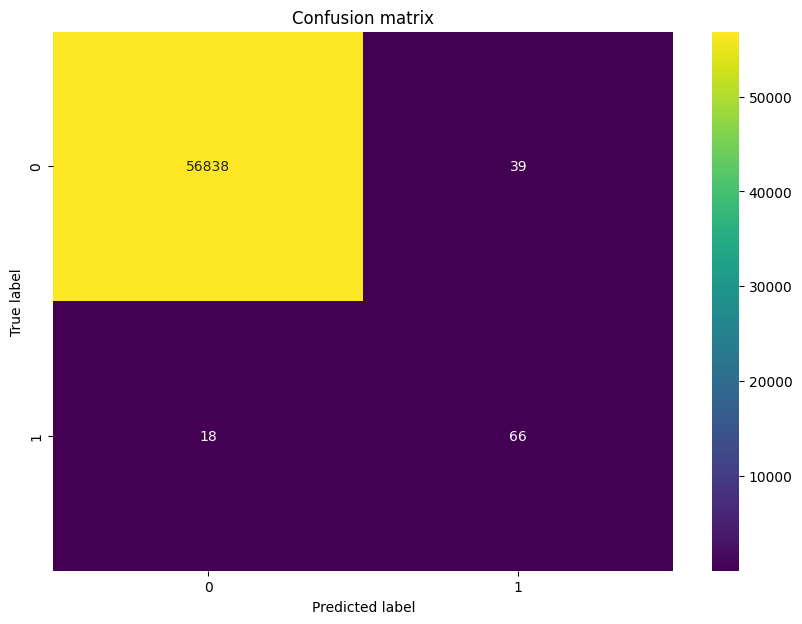

In [ ]:
print(classification_report(y_test, y_hat))
plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=[0,1], normalize=False)

Normalized confusion matrix

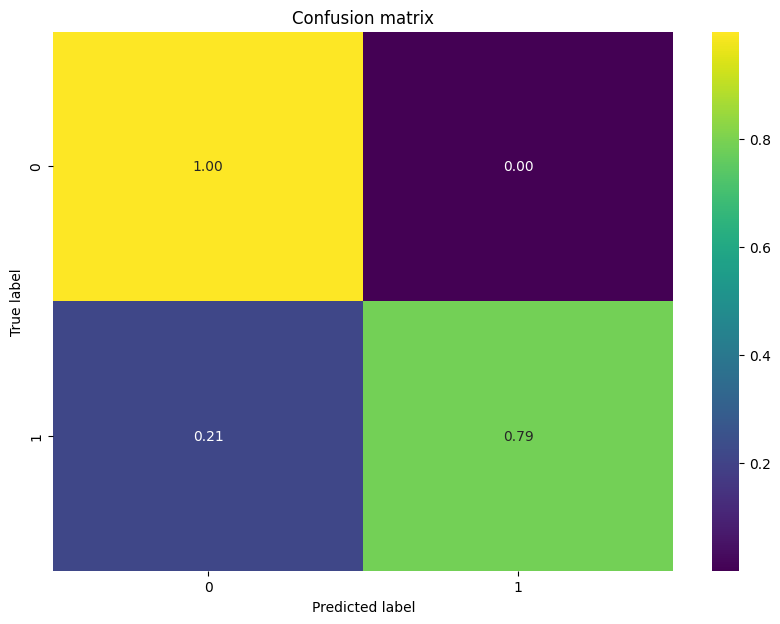

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=[0,1], normalize=True)

##Classify without data denoising

###Prepare data

In [ ]:
X_train_tensor = torch.tensor(X_train_oversample, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_oversample, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataset_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

###Train classifier

In [ ]:
classifier_model2 = Classifier().to(device)
classifier_model2.fit(train_dataset_loader, validation_loader, epochs=50, lr=1e-4)

Epoch 1, Train Loss: 0.44327305233845204, Validation Loss: 0.3428182780341717, Accuracy: 97.93019908008849%
Epoch 2, Train Loss: 0.33693574062658266, Validation Loss: 0.3293251842928574, Accuracy: 98.46739931884414%
Epoch 3, Train Loss: 0.32517630837729167, Validation Loss: 0.3240545392704651, Accuracy: 98.91857729714546%
Epoch 4, Train Loss: 0.3198809597224824, Validation Loss: 0.31944057338708187, Accuracy: 99.3837997261332%
Epoch 5, Train Loss: 0.31808574514467736, Validation Loss: 0.31837005265090496, Accuracy: 99.49088866261718%
Epoch 6, Train Loss: 0.31722940121122706, Validation Loss: 0.3176556302426642, Accuracy: 99.55057757803448%
Epoch 7, Train Loss: 0.31665810948239176, Validation Loss: 0.31653639146298035, Accuracy: 99.66468873986166%
Epoch 8, Train Loss: 0.3161974053072554, Validation Loss: 0.31640760640659676, Accuracy: 99.6857554158913%
Epoch 9, Train Loss: 0.3158196433204864, Validation Loss: 0.31599466095056233, Accuracy: 99.73139988062216%
Epoch 10, Train Loss: 0.3156

###Select best parameters

In [ ]:
max_acc = 0

for (model_param, acc) in classifier_model2.model_parameters_history:
  if (acc > max_acc):
    best_parameters = model_param
    max_acc = acc

print(max_acc)

0.9984726659878516


###Load best model

In [ ]:
classifier_model2.load_state_dict(best_parameters)

<All keys matched successfully>

In [ ]:
y_hat_tensor = classifier_model2(X_test_tensor)

In [ ]:
y_test = y_test_tensor.detach().cpu().numpy()
y_hat = y_hat_tensor.detach().cpu().numpy()
y_hat = np.argmax(y_hat, axis=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.49      0.79      0.60        84

    accuracy                           1.00     56961
   macro avg       0.74      0.89      0.80     56961
weighted avg       1.00      1.00      1.00     56961



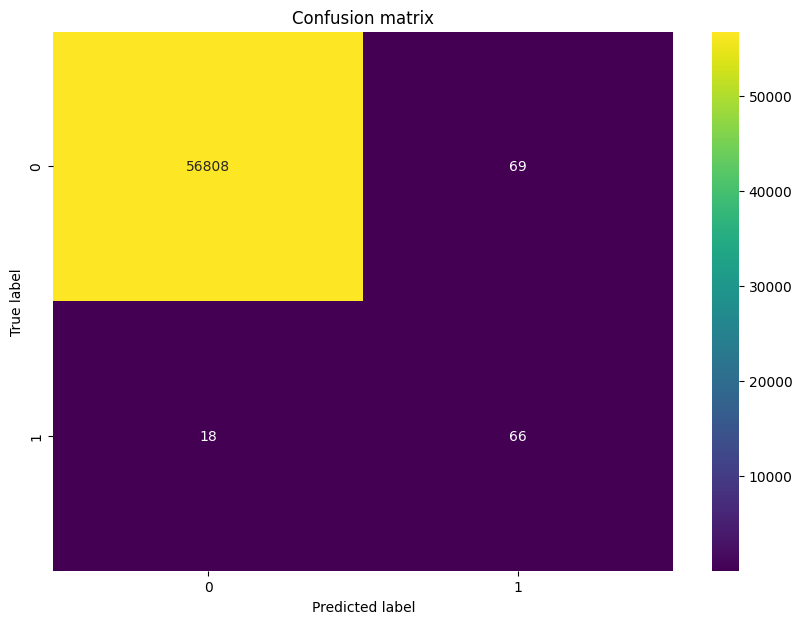

In [ ]:
print(classification_report(y_test, y_hat))
plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=[0,1], normalize=False)

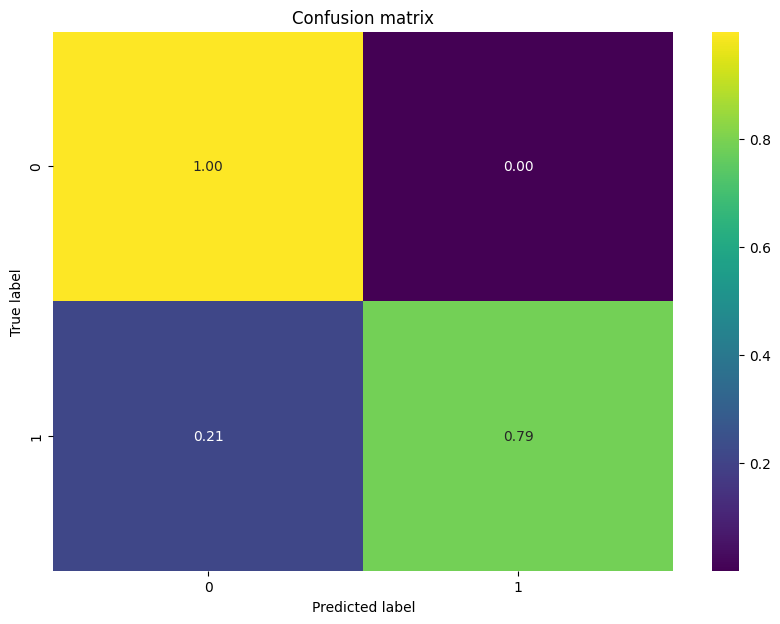

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=[0,1], normalize=True)